In [66]:
# Importing necessities for the analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [67]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)

In [68]:
# Loading the data
df_churn=pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [69]:
# take a look at the first few lines
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [71]:
# Checking if the ids are unique or not
df_churn['customerID'].duplicated().sum()


np.int64(0)

In [72]:
df_churn['TotalCharges'].iloc[6754]

' '

In [73]:
# converting Total charges to float dtype
# df_churn['TotalCharges']=df_churn['TotalCharges'].astype('float')

There was a problem converting the col to numeric this indicated there are values in the column that are not numbers.
To find these values i will use pd.to_numeric with coerce error parameter, this will replace the non number values with nan, then if i subset the part of the original df where these values are missing after the conversion we can find the original values.

In [74]:
# Checking for non number values in TotalCharges
non_numeric_values = df_churn[pd.to_numeric(df_churn['TotalCharges'], errors='coerce').isna()]
non_numeric_values['TotalCharges']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

It looks like the walues here are empty strings, but I think we can find the correct values clculating it from tenure and the monthly charges or find out the reason of missingness

In [75]:
df_churn[['TotalCharges','MonthlyCharges', 'tenure']]


,TotalCharges,MonthlyCharges,tenure
0,29.85,29.85,1
1,1889.5,56.95,34
2,108.15,53.85,2
3,1840.75,42.30,45
4,151.65,70.70,2
...,...,...,...
7038,1990.5,84.80,24
7039,7362.9,103.20,72
7040,346.45,29.60,11
7041,306.6,74.40,4


In [76]:
non_numeric_values[['TotalCharges','tenure']]

,TotalCharges,tenure
488,,0
753,,0
936,,0
1082,,0
1340,,0
3331,,0
3826,,0
4380,,0
5218,,0
6670,,0


In [77]:
df_churn[df_churn['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We found out why the values are missing, they are new customers and the first mont may be a 'free trial' or they did not get billed yet. we can replace the value with 0 or the monthly charges.(since where tenure is 1 the total charges are equal to the monthly charges we are going to use 0 as replacement to keep the difference between new customers and customers with 1 month tenure, even tho the number of these individuals is very low)

In [78]:
# Converting to numeric and replace the missing values
df_churn['TotalCharges']=pd.to_numeric(df_churn['TotalCharges'], errors='coerce').fillna(0)
df_churn['TotalCharges'].isna().sum()

np.int64(0)

NO duplicated ids so ill will set this column to be the index 

In [79]:
df_churn=df_churn.set_index('customerID')

In [80]:
# Checking the number of unique values in the cols
for c in df_churn.columns:
    print(f"Distinct Values counts in {c}: {df_churn[c].nunique()}")

Distinct Values counts in gender: 2
Distinct Values counts in SeniorCitizen: 2
Distinct Values counts in Partner: 2
Distinct Values counts in Dependents: 2
Distinct Values counts in tenure: 73
Distinct Values counts in PhoneService: 2
Distinct Values counts in MultipleLines: 3
Distinct Values counts in InternetService: 3
Distinct Values counts in OnlineSecurity: 3
Distinct Values counts in OnlineBackup: 3
Distinct Values counts in DeviceProtection: 3
Distinct Values counts in TechSupport: 3
Distinct Values counts in StreamingTV: 3
Distinct Values counts in StreamingMovies: 3
Distinct Values counts in Contract: 3
Distinct Values counts in PaperlessBilling: 2
Distinct Values counts in PaymentMethod: 4
Distinct Values counts in MonthlyCharges: 1585
Distinct Values counts in TotalCharges: 6531
Distinct Values counts in Churn: 2


In [81]:
for c in df_churn.drop(columns=['tenure', 'MonthlyCharges','TotalCharges']):
    print(f"Value counts in {df_churn[c].value_counts()}")

Value counts in gender
Male      3555
Female    3488
Name: count, dtype: int64
Value counts in SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Value counts in Partner
No     3641
Yes    3402
Name: count, dtype: int64
Value counts in Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Value counts in PhoneService
Yes    6361
No      682
Name: count, dtype: int64
Value counts in MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
Value counts in InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
Value counts in OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
Value counts in OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
Value counts in DeviceProtection
No                     3095
Yes                    24

We can see that there are 3 continous cols, 2 with charges and one with the tenure of the customer.
there is PaymentMethod with 4 categories, the rest are binary columns or can be converted to binary(Many columns has the third value as no phone or internet service, but we already have a column indicateing this, so we can simply convert the third value to 'No'). Most machine learning models perform better with binary cols.

In [82]:
phone_service_related_cols=['MultipleLines']
internet_service_related_cols=['DeviceProtection','OnlineBackup','OnlineSecurity','StreamingTV','TechSupport','StreamingMovies']


In [83]:
df_churn['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [84]:
phone_service_related_cols=['MultipleLines']
internet_service_related_cols=['DeviceProtection','OnlineBackup','OnlineSecurity','StreamingTV','TechSupport','StreamingMovies']

df_churn['MultipleLines']=df_churn['MultipleLines'].replace({'No phone service': 'No'})
for c in internet_service_related_cols:
    df_churn[c]=df_churn[c].replace({'No internet service': 'No'})

In [85]:
# Type groups
numeric_continous_cols=['MonthlyCharges', 'TotalCharges','tenure']

binary_cols=['gender','SeniorCitizen', 'Partner', 'Dependents','PhoneService','MultipleLines',
            'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 
            'StreamingTV','StreamingMovies', 'PaperlessBilling','Churn']

categorical_cols=['InternetService','PaymentMethod','Contract']

# making sure we listed all columns
len(df_churn.columns)==len(numeric_continous_cols+binary_cols+categorical_cols)

True

The data seems to be of good quality and without missing values.
A typical churn dataset with anonymized customer ids features and target outcomes.
I'm going to do some EDA then train and evaluate a classification model to predict the target values. 

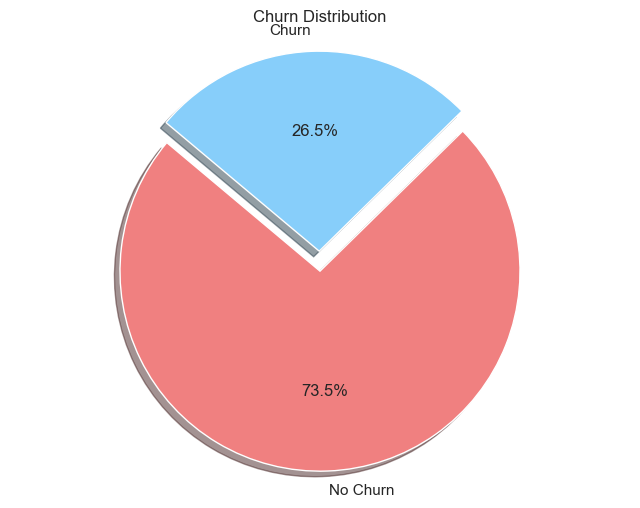

In [86]:

churn_counts = df_churn['Churn'].value_counts()

# Define labels and sizes
labels = ['No Churn', 'Churn']
sizes = churn_counts.values
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
plt.title('Churn Distribution')
plt.show()


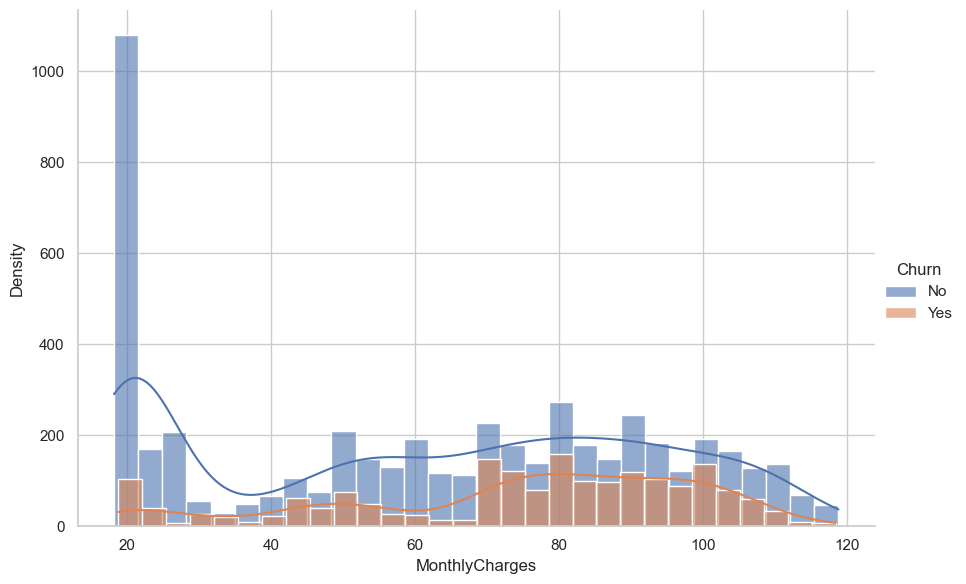

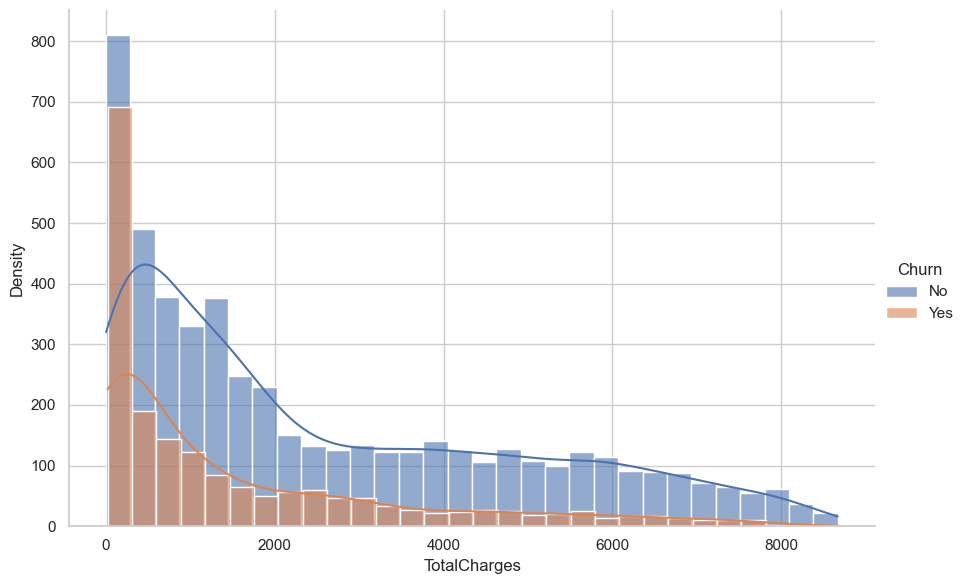

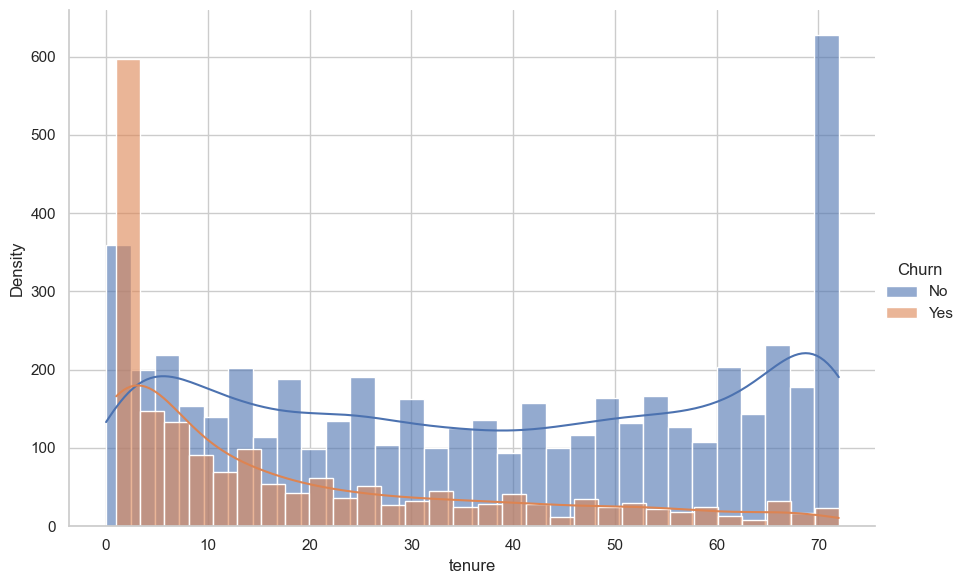

In [87]:
churn_column = 'Churn'  

# Set the style for the plots
sns.set(style="whitegrid")

# Plot distributions for continuous features, differentiated by churn status
for feature in numeric_continous_cols:
    g = sns.FacetGrid(df_churn, hue=churn_column, height=6, aspect=1.5)
    g.map(sns.histplot, feature, bins=30, kde=True, alpha=0.6)
    g.add_legend()
    g.set_axis_labels(feature, 'Density')
    g.set_titles(f'Distribution of {feature} by Churn Status')
    plt.show()


Key takeaway: 


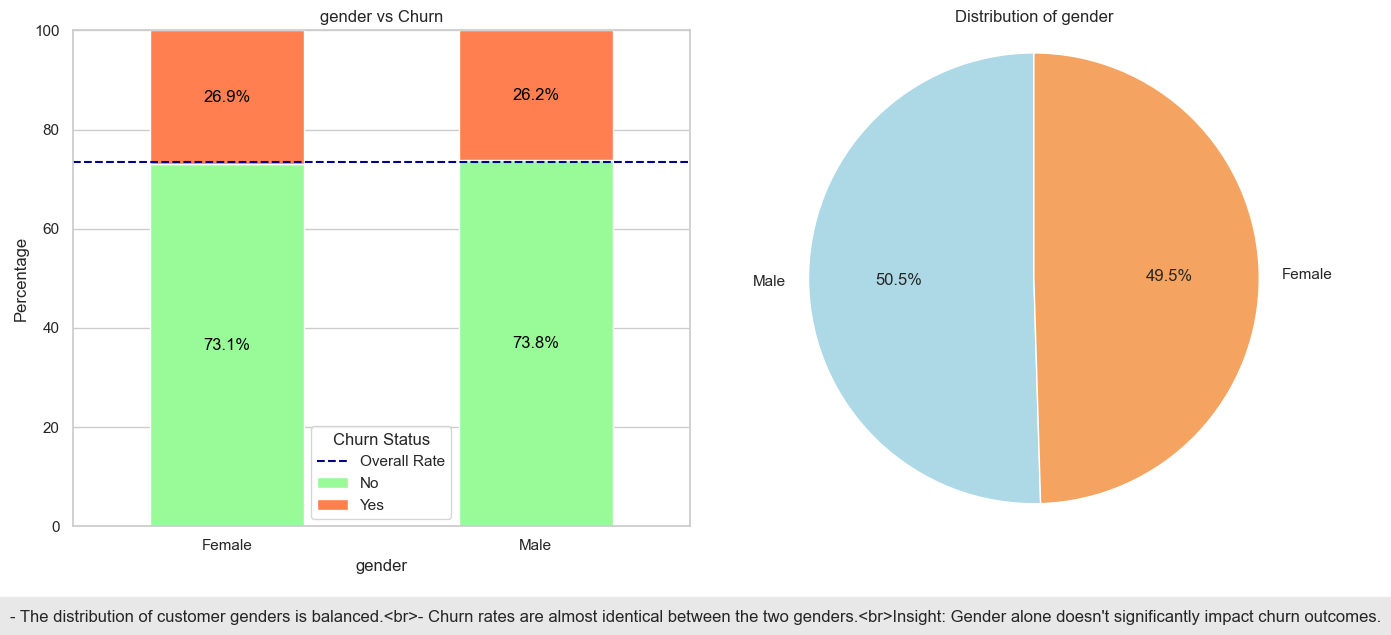

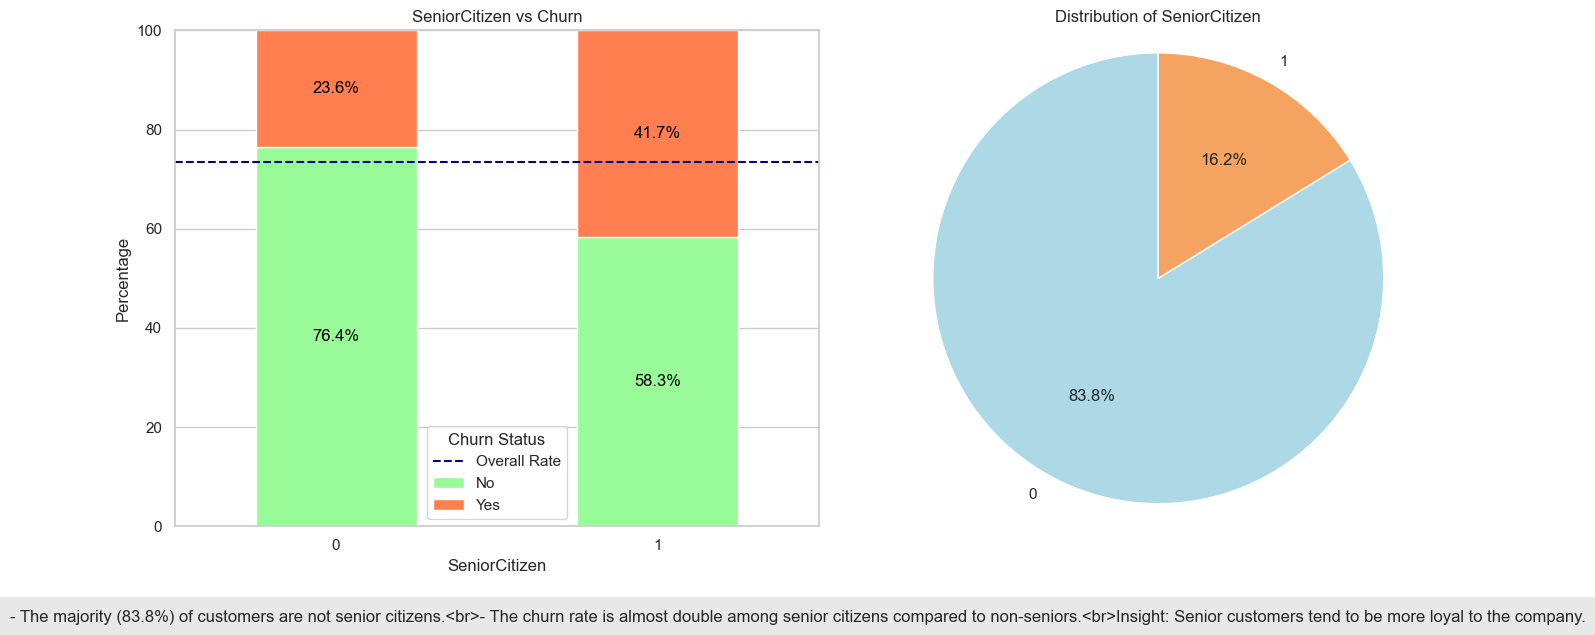

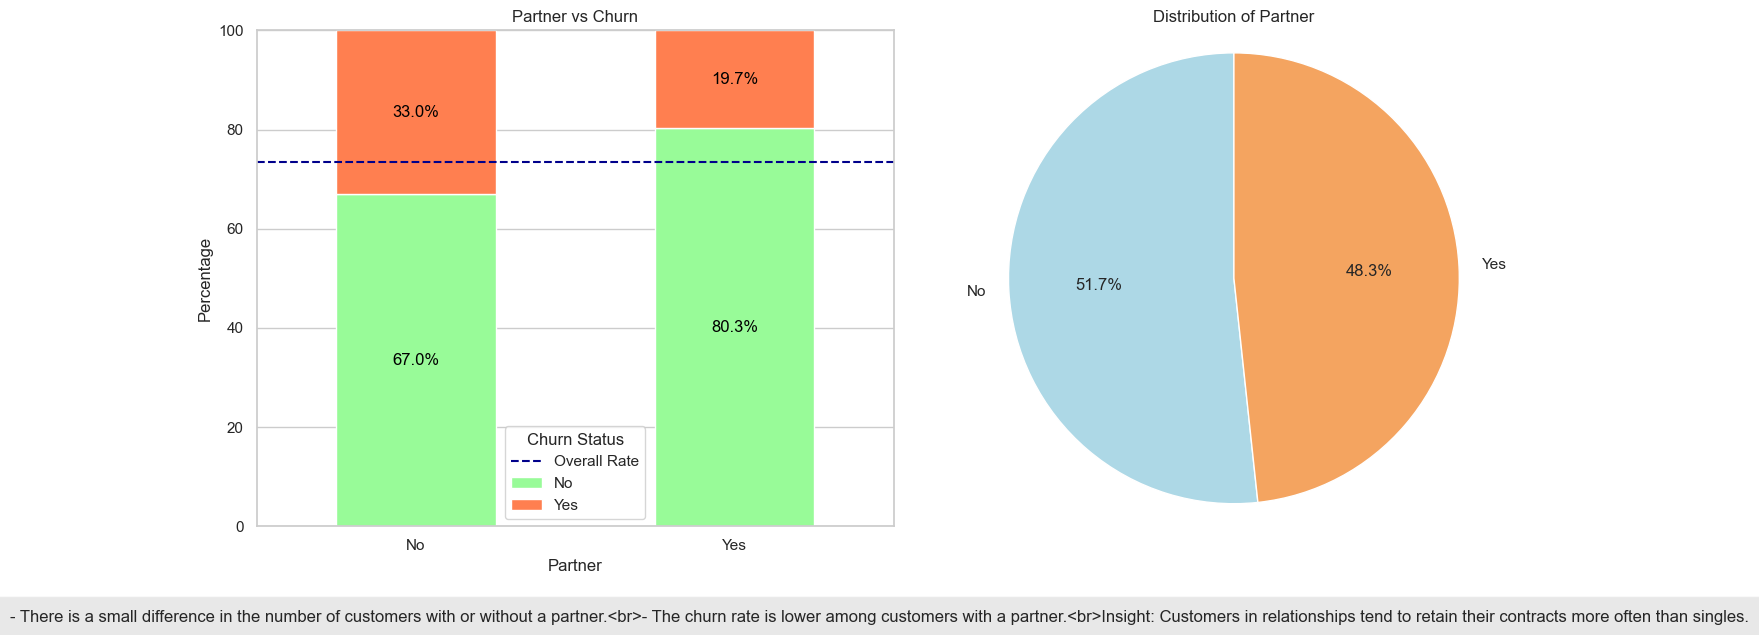

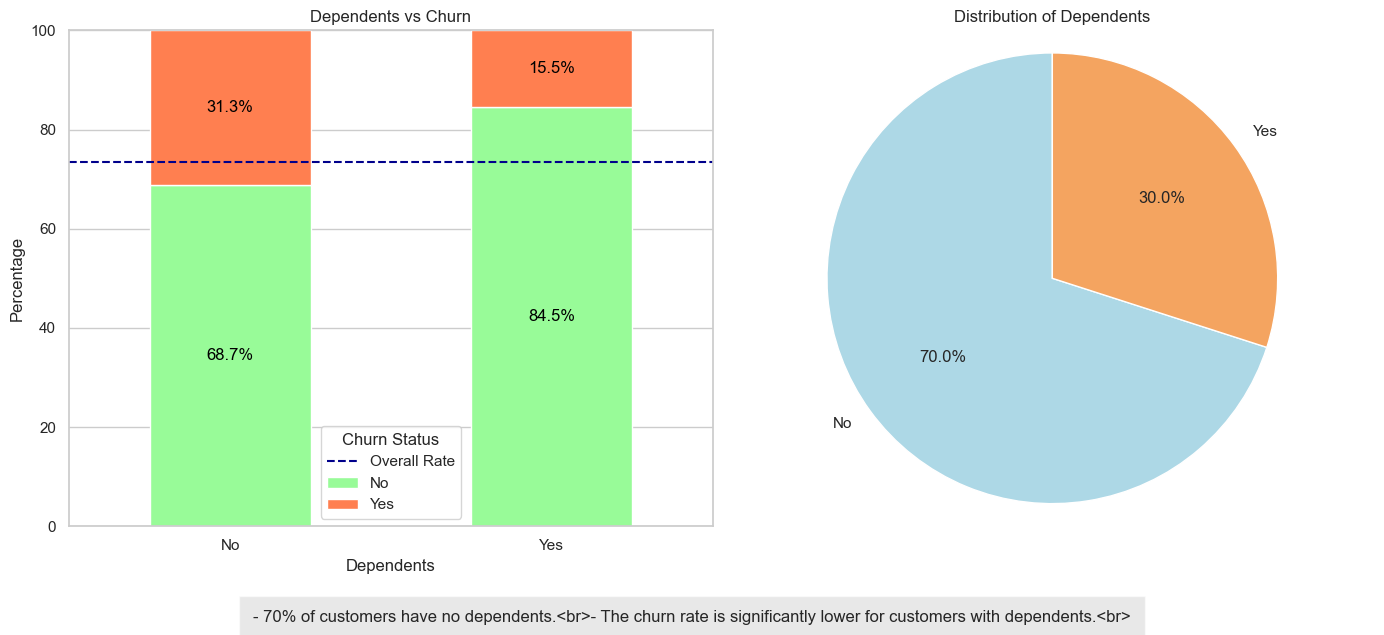

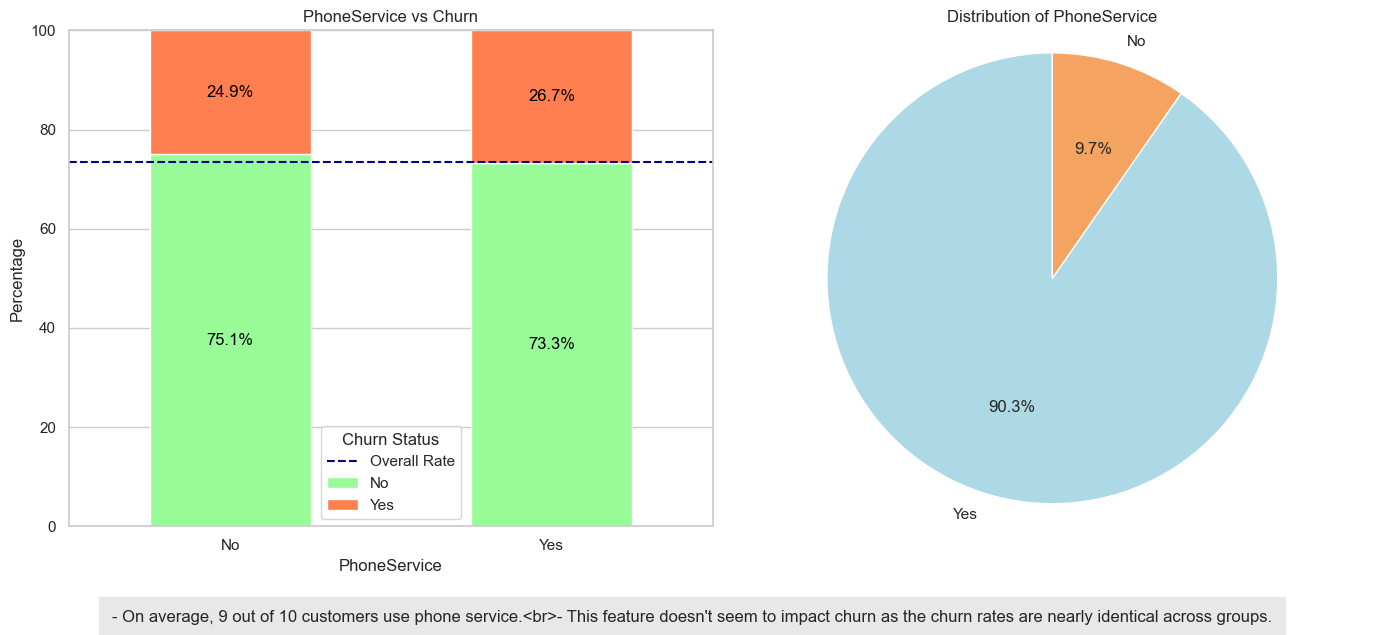

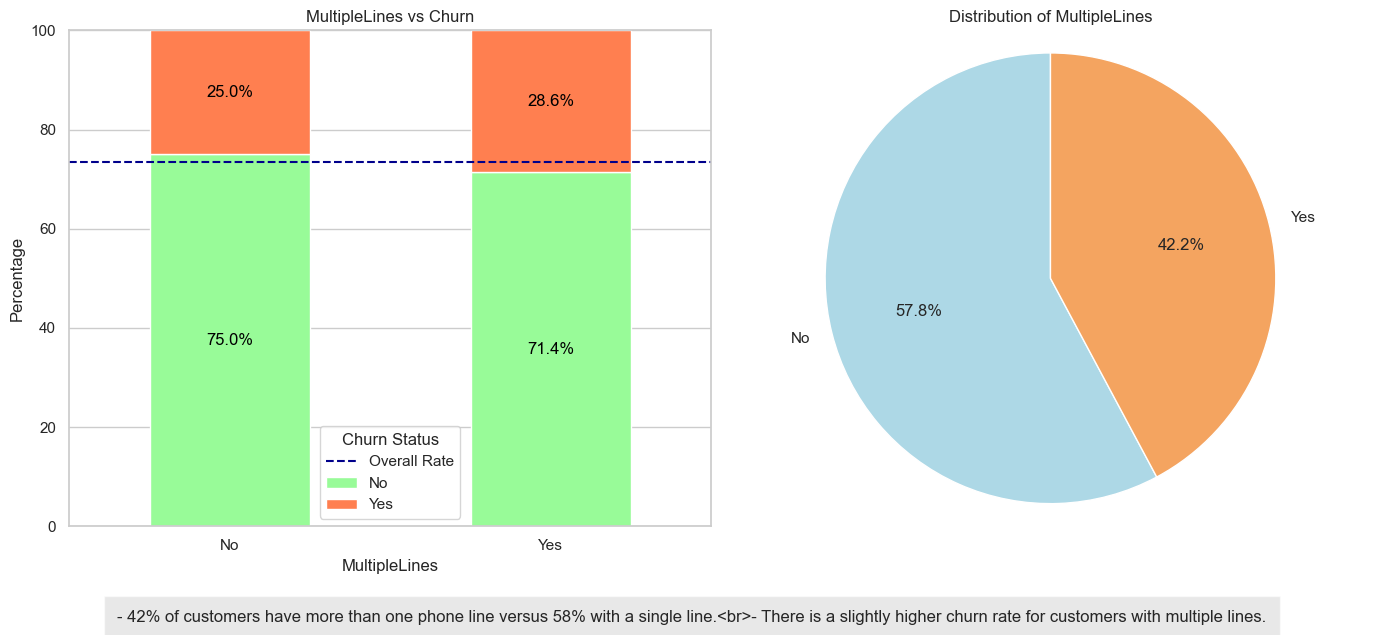

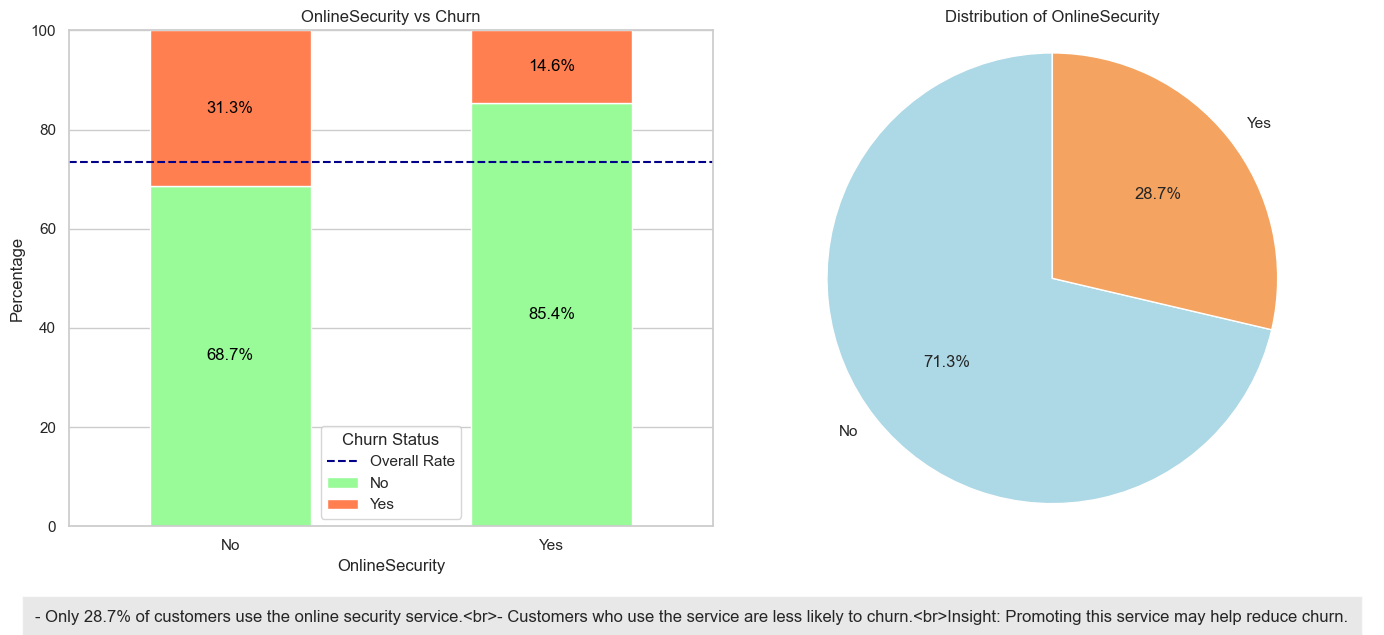

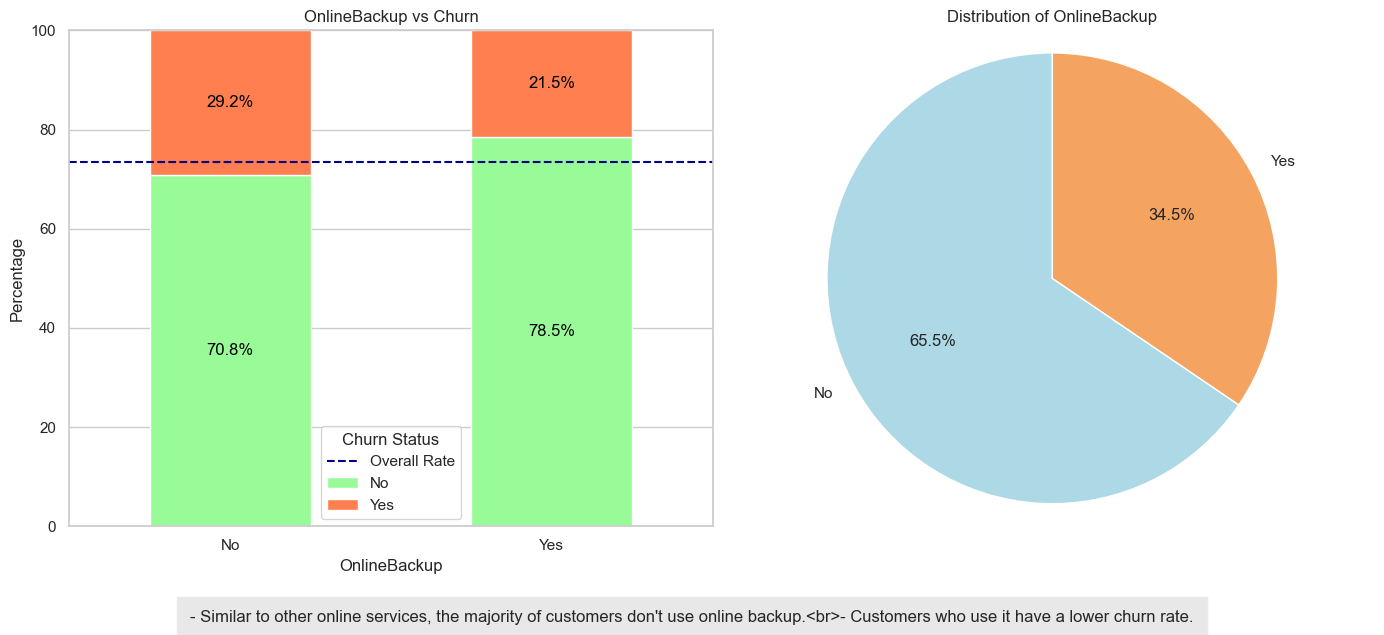

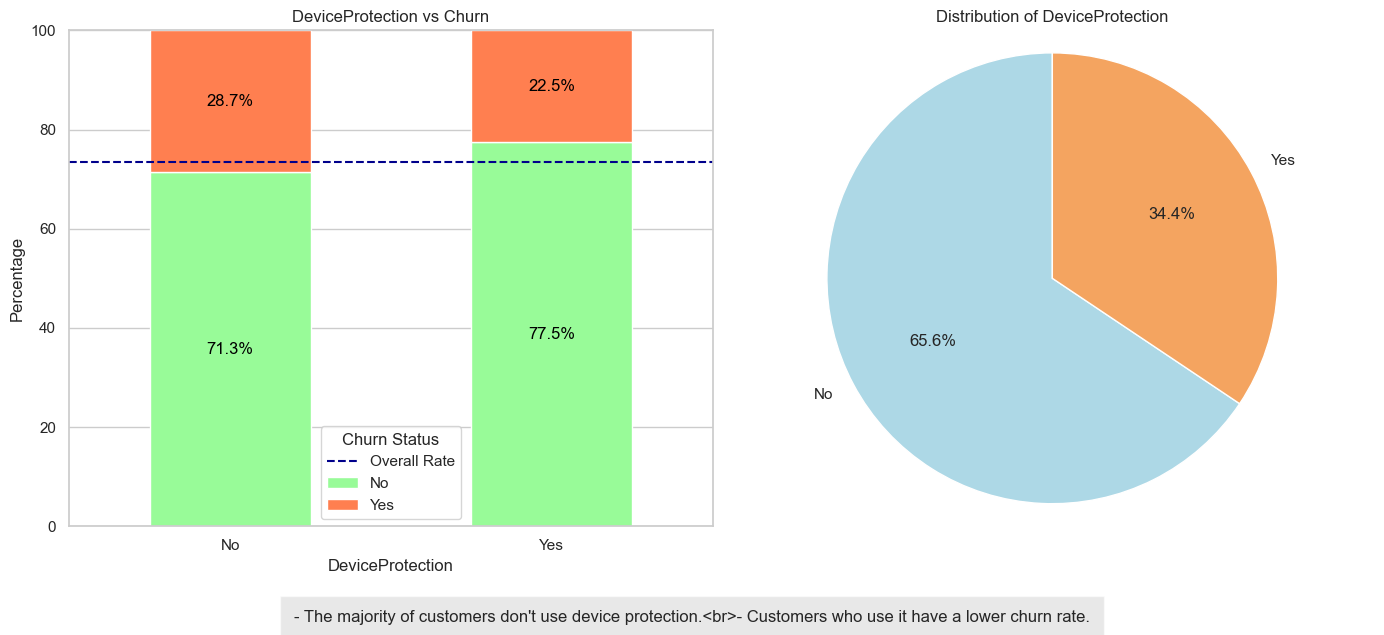

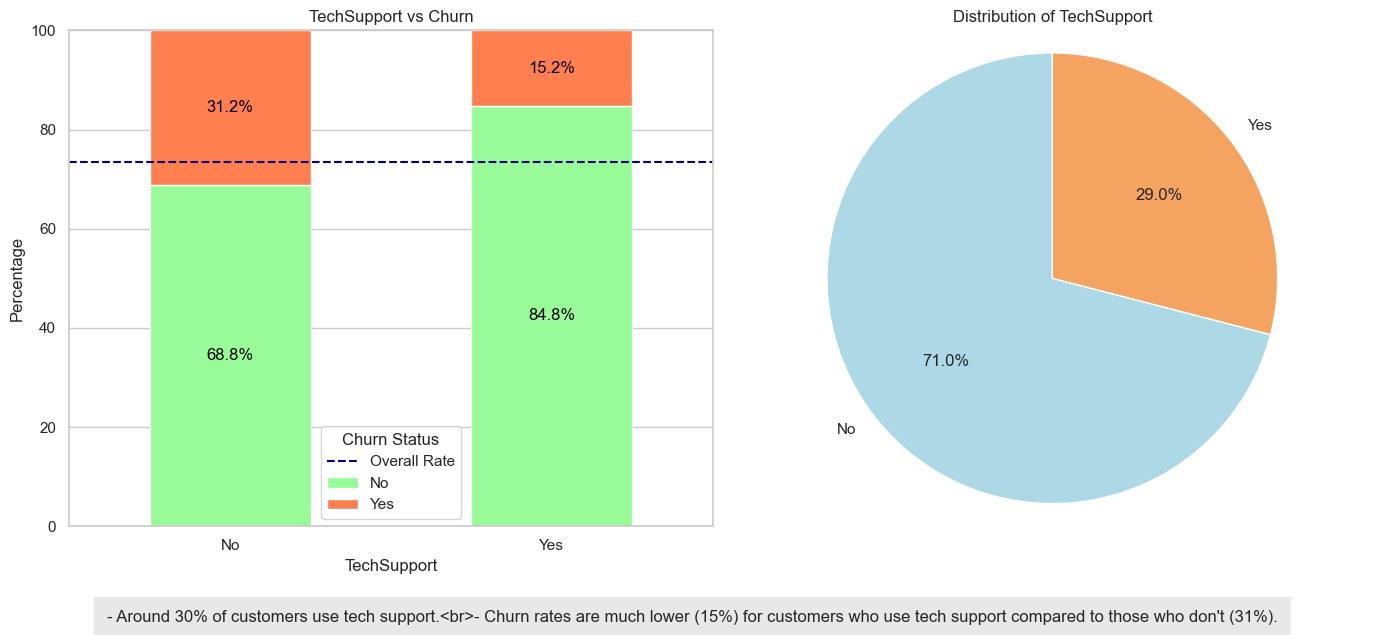

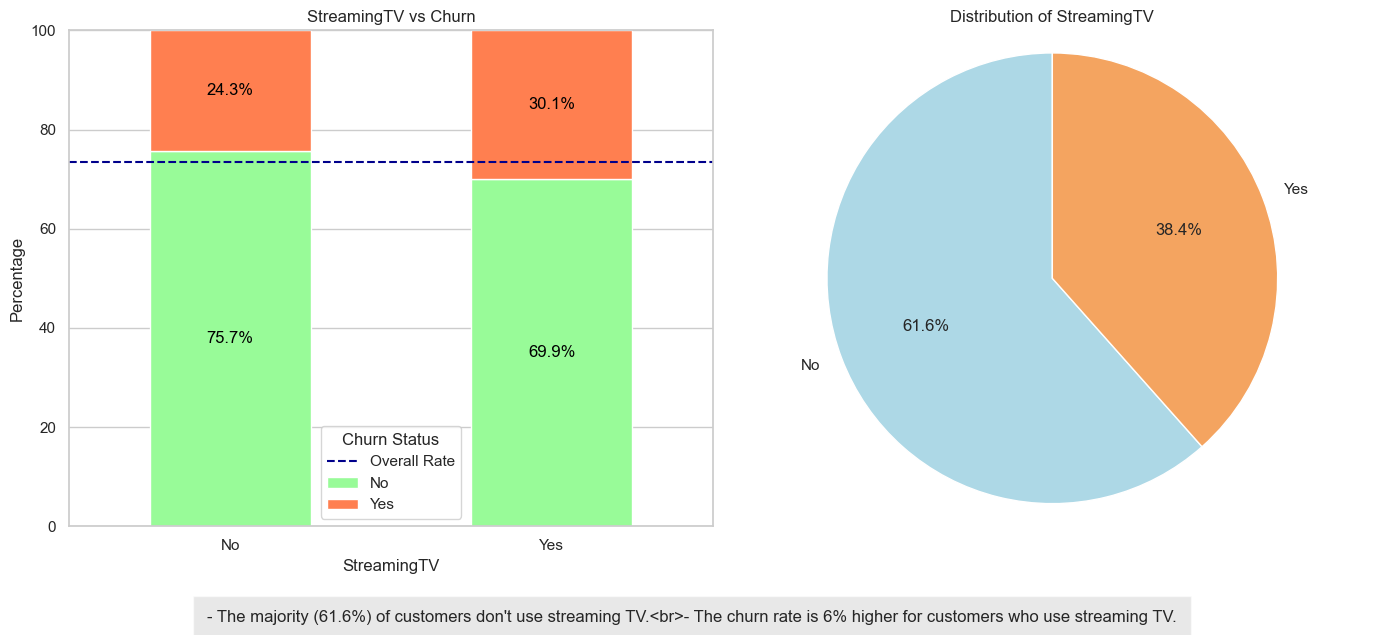

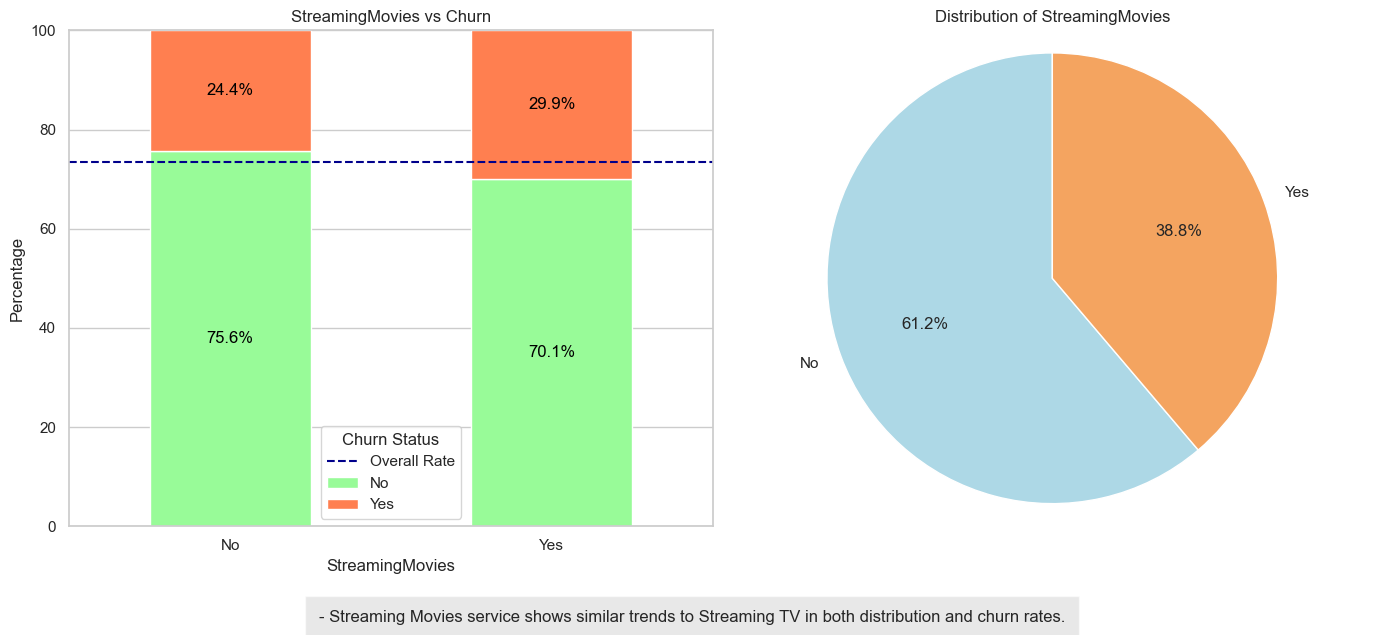

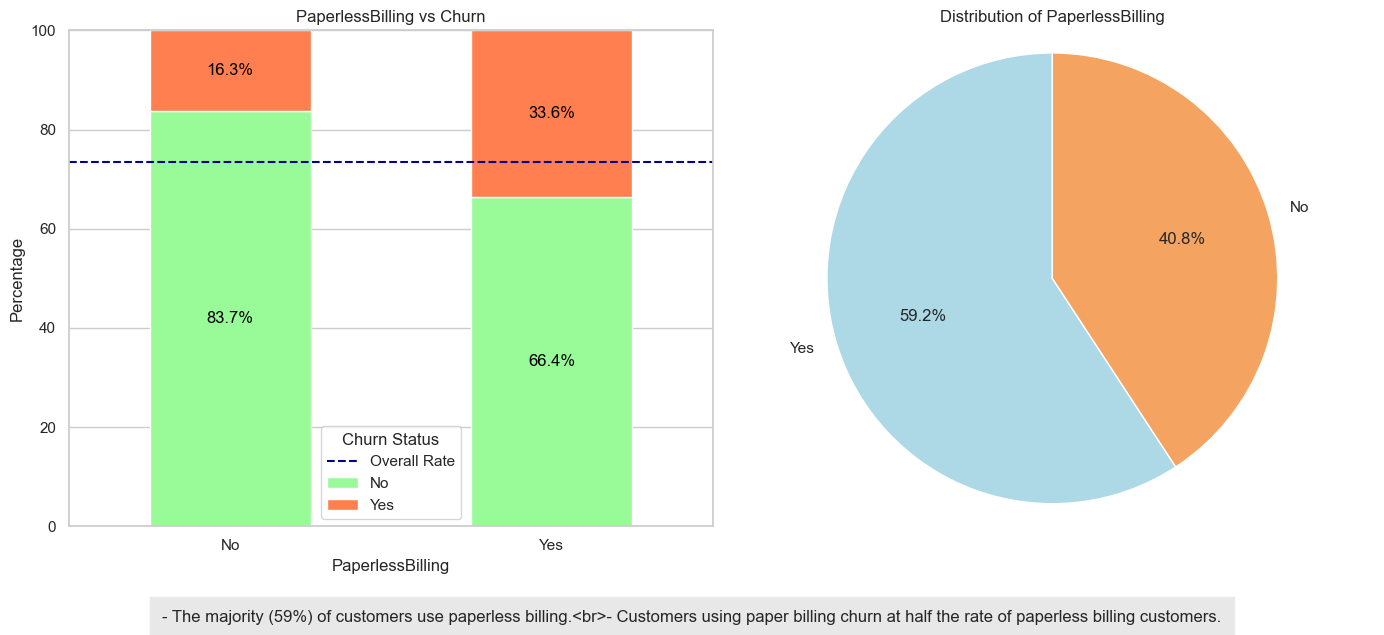

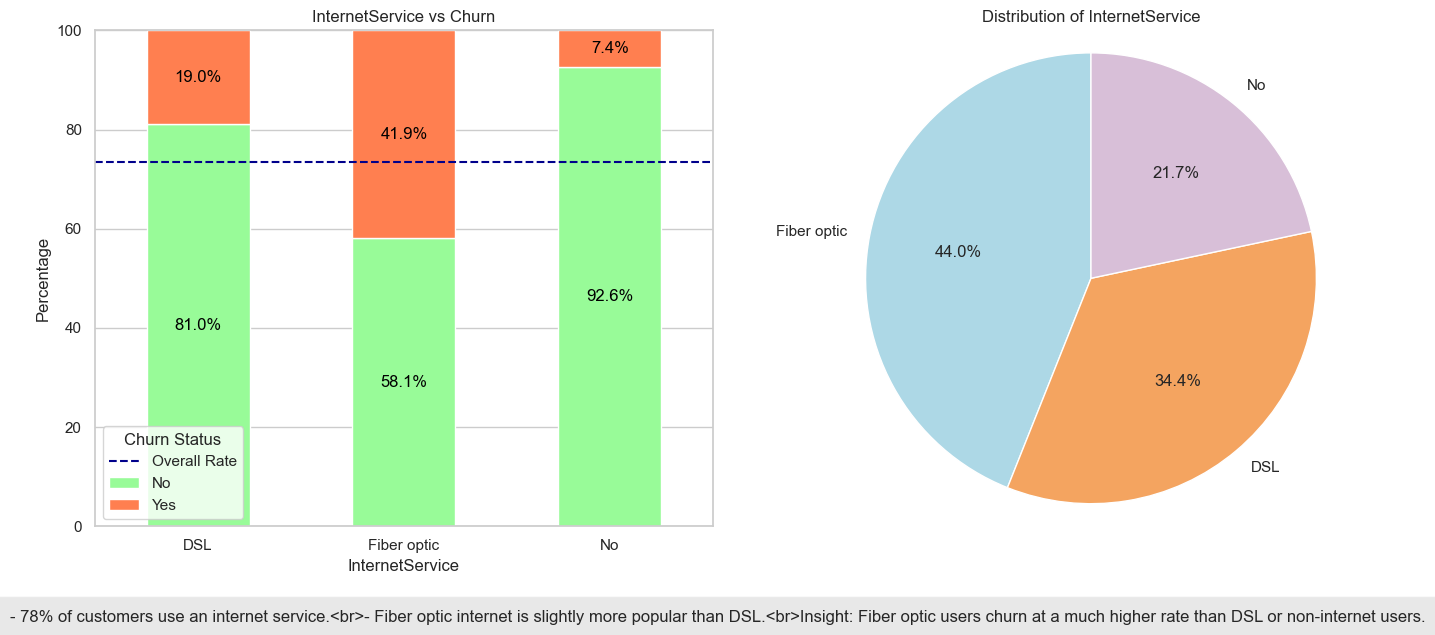

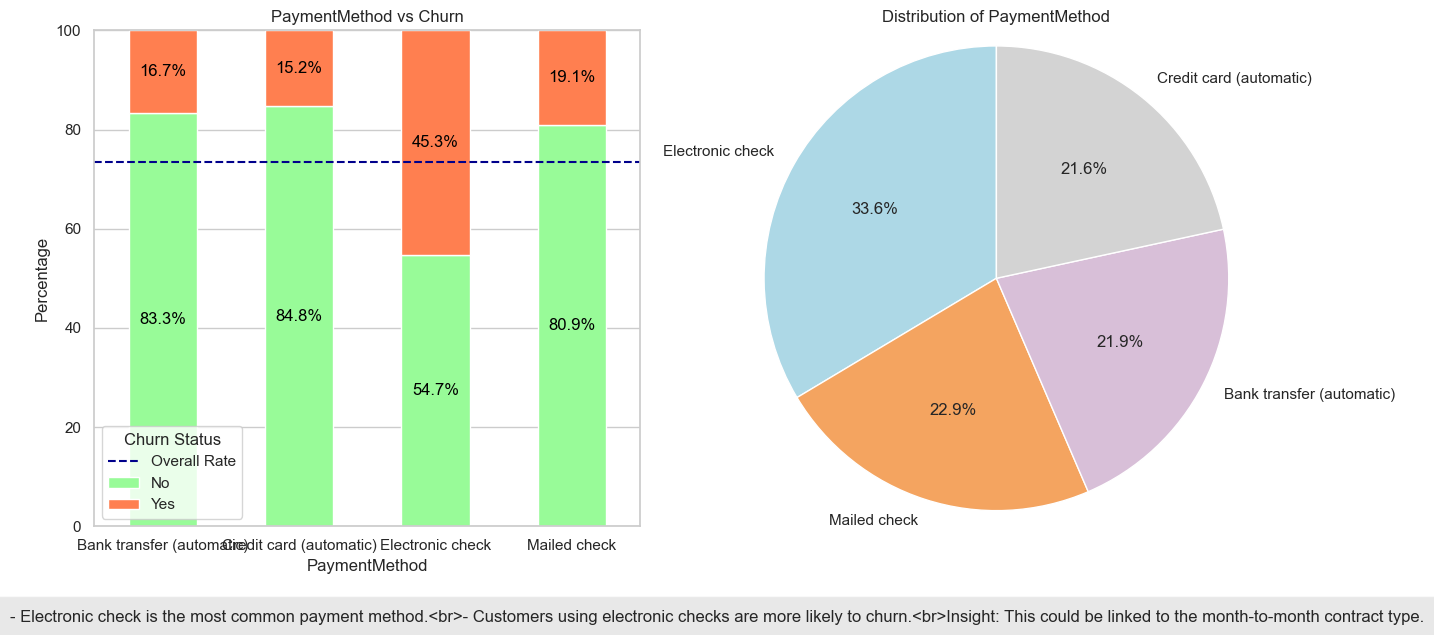

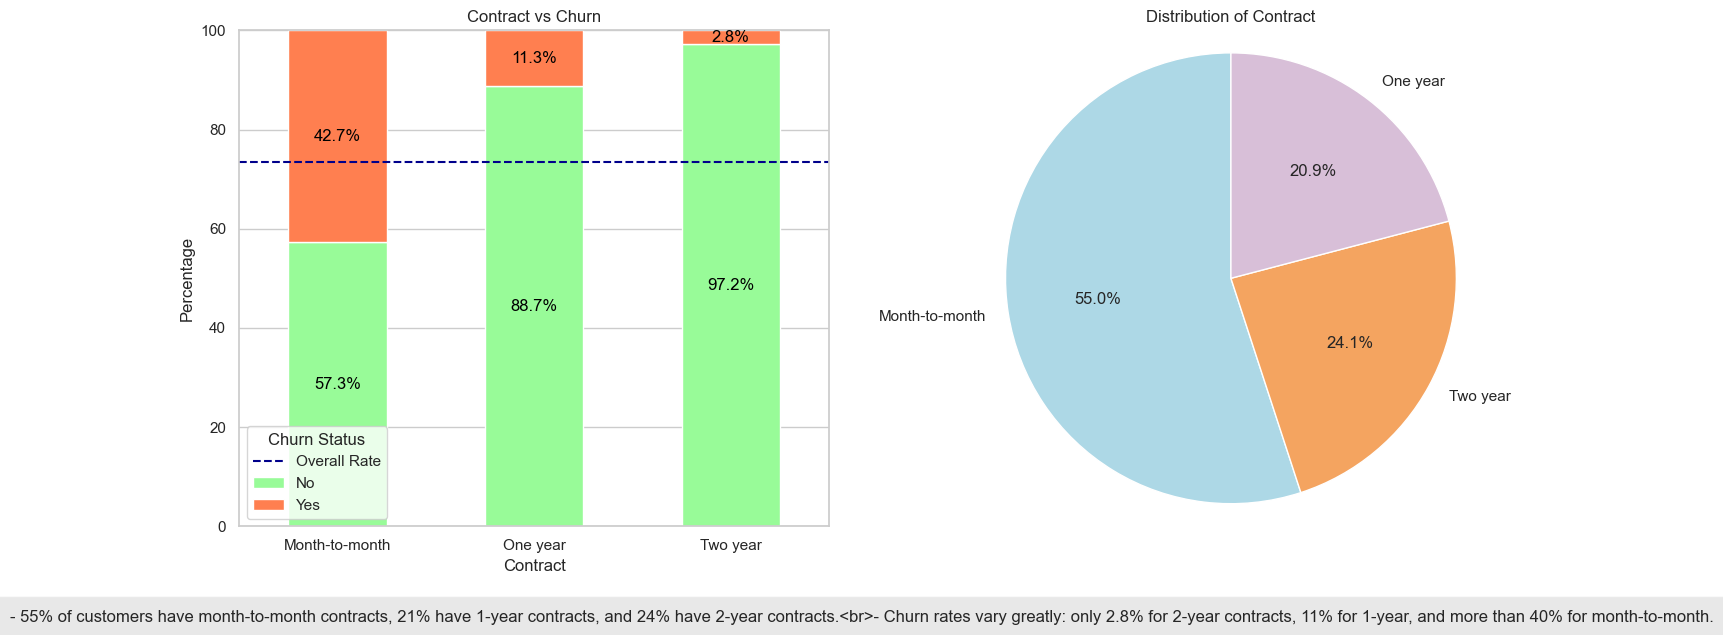

In [88]:

# Summaries for each feature
summaries = {
    'gender': "- The distribution of customer genders is balanced.<br>"
              "- Churn rates are almost identical between the two genders.<br>"
              "Insight: Gender alone doesn't significantly impact churn outcomes.",
    'SeniorCitizen': "- The majority (83.8%) of customers are not senior citizens.<br>"
                     "- The churn rate is almost double among senior citizens compared to non-seniors.<br>"
                     "Insight: Senior customers tend to be more loyal to the company.",
    'Partner': "- There is a small difference in the number of customers with or without a partner.<br>"
               "- The churn rate is lower among customers with a partner.<br>"
               "Insight: Customers in relationships tend to retain their contracts more often than singles.",
    'Dependents': "- 70% of customers have no dependents.<br>"
                  "- The churn rate is significantly lower for customers with dependents.<br>",
    'PhoneService': "- On average, 9 out of 10 customers use phone service.<br>"
                    "- This feature doesn't seem to impact churn as the churn rates are nearly identical across groups.",
    'MultipleLines': "- 42% of customers have more than one phone line versus 58% with a single line.<br>"
                     "- There is a slightly higher churn rate for customers with multiple lines.",
    'OnlineSecurity': "- Only 28.7% of customers use the online security service.<br>"
                      "- Customers who use the service are less likely to churn.<br>"
                      "Insight: Promoting this service may help reduce churn.",
    'OnlineBackup': "- Similar to other online services, the majority of customers don't use online backup.<br>"
                    "- Customers who use it have a lower churn rate.",
    'DeviceProtection': "- The majority of customers don't use device protection.<br>"
                        "- Customers who use it have a lower churn rate.",
    'TechSupport': "- Around 30% of customers use tech support.<br>"
                   "- Churn rates are much lower (15%) for customers who use tech support compared to those who don't (31%).",
    'StreamingTV': "- The majority (61.6%) of customers don't use streaming TV.<br>"
                   "- The churn rate is 6% higher for customers who use streaming TV.",
    'StreamingMovies': "- Streaming Movies service shows similar trends to Streaming TV in both distribution and churn rates.",
    'PaperlessBilling': "- The majority (59%) of customers use paperless billing.<br>"
                        "- Customers using paper billing churn at half the rate of paperless billing customers.",
    'InternetService': "- 78% of customers use an internet service.<br>"
                       "- Fiber optic internet is slightly more popular than DSL.<br>"
                       "Insight: Fiber optic users churn at a much higher rate than DSL or non-internet users.",
    'PaymentMethod': "- Electronic check is the most common payment method.<br>"
                     "- Customers using electronic checks are more likely to churn.<br>"
                     "Insight: This could be linked to the month-to-month contract type.",
    'Contract': "- 55% of customers have month-to-month contracts, 21% have 1-year contracts, and 24% have 2-year contracts.<br>"
                "- Churn rates vary greatly: only 2.8% for 2-year contracts, 11% for 1-year, and more than 40% for month-to-month."
}


# Calculate the overall churn rate
churns = df_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
overall_churn_rate = churns.mean() * 100

# Define feature columns
feature_cols = binary_cols + categorical_cols
feature_cols.remove('Churn')

# Loop through features
for feature in feature_cols:
    plt.figure(figsize=(14, 6))

    # Create a DataFrame for counting
    churn_counts = df_churn.groupby([feature, 'Churn']).size().unstack(fill_value=0)
    
    # Calculate percentages
    churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

    # Create a stacked bar chart with "No Churn" stacked on top of "Churn"
    ax1 = plt.subplot(121)  # Create first subplot (1 row, 2 columns, first subplot)
    
    # Plot the "No Churn" first, then "Churn"
    bars = churn_percentages[['No', 'Yes']].plot(kind='bar', stacked=True, color=['palegreen', 'coral'], ax=ax1)

    # Add average churn rate line
    ax1.axhline(y=100 - overall_churn_rate, color='darkblue', linestyle='--', label='Overall Rate')
    ax1.set_title(f'{feature} vs Churn')
    ax1.set_ylabel('Percentage')
    ax1.set_xlabel(feature)
    ax1.set_ylim(0, 100)
    ax1.legend(title='Churn Status')

    ax1.set_xticklabels(churn_percentages.index, rotation=0, ha='center')  # Set x labels to be horizontal
    # Add percentage labels to each bar segment
    for index in range(len(churn_percentages)):
        no_churn_height = churn_percentages['No'].iloc[index]
        yes_churn_height = churn_percentages['Yes'].iloc[index]
        
        # Annotate "No Churn" segment
        ax1.annotate(f'{no_churn_height:.1f}%', 
                     (index, no_churn_height / 2),  # Position in the middle of the "No Churn" segment
                     ha='center', va='center', color='black')

        # Annotate "Churn" segment
        ax1.annotate(f'{yes_churn_height:.1f}%', 
                     (index, no_churn_height + yes_churn_height / 2),  # Position in the middle of the "Churn" segment
                     ha='center', va='center', color='black')

    # Create a pie chart
    ax2 = plt.subplot(122)  # Create second subplot
    pie_data = df_churn[feature].value_counts()
    ax2.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'sandybrown', 'thistle', 'lightgray'])
    ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax2.set_title(f'Distribution of {feature}')

    # Add summary text
    plt.figtext(0.5, -0.05, summaries[feature], ha="center", fontsize=12, bbox={"facecolor": "lightgray", "alpha": 0.5, "pad": 10})

    plt.tight_layout()
    plt.show()


Until this point it was convinient to keep the values as they were originally in the df.
As a next step I want to visualize the correlations between features and target, for this we need to convert the columns to numeric(also an important step before ml training)

In [89]:
# One hot encoding categories
one_hot_encoder = ce.OneHotEncoder(cols=categorical_cols,handle_unknown='ignore')
df_churn=one_hot_encoder.fit_transform(df_churn)

# convert binary cols to numeric
for c in binary_cols:
    df_churn[c]=df_churn[c].replace({'No':0,'Yes': 1})
df_churn['gender']=df_churn['gender'].replace({'Female': 0,'Male':1})

C:\Users\Admin\AppData\Local\Temp\ipykernel_18856\3046338685.py:7: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\Admin\AppData\Local\Temp\ipykernel_18856\3046338685.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [90]:
# checking dtypes in df
df_churn.dtypes

gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
InternetService_1      int64
InternetService_2      int64
InternetService_3      int64
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
Contract_1             int64
Contract_2             int64
Contract_3             int64
PaperlessBilling       int64
PaymentMethod_1        int64
PaymentMethod_2        int64
PaymentMethod_3        int64
PaymentMethod_4        int64
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
dtype: object

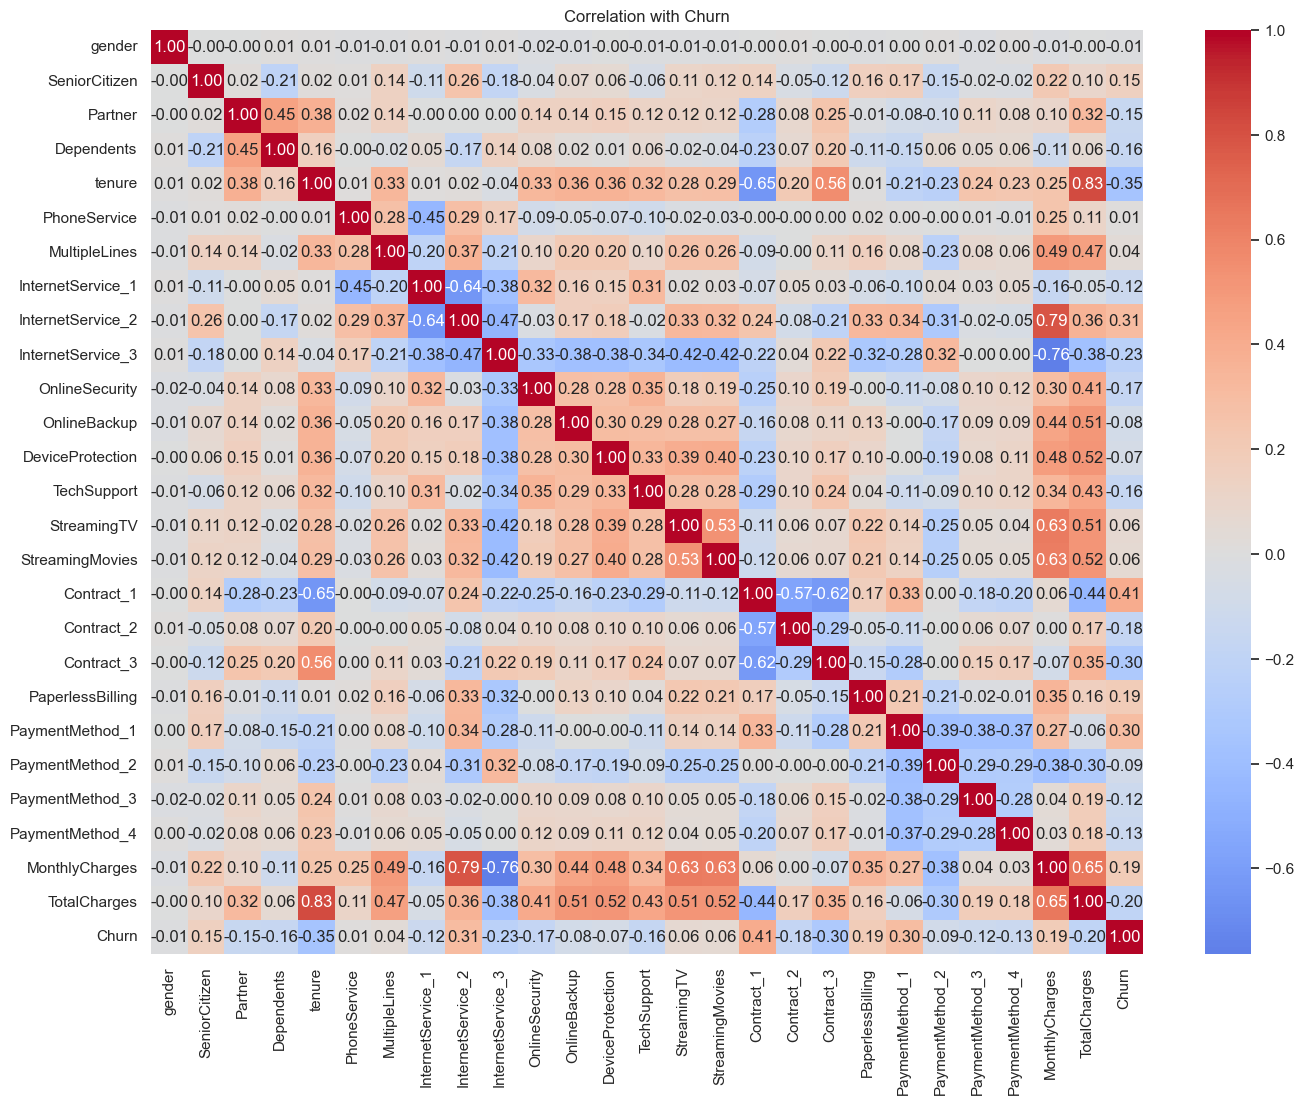

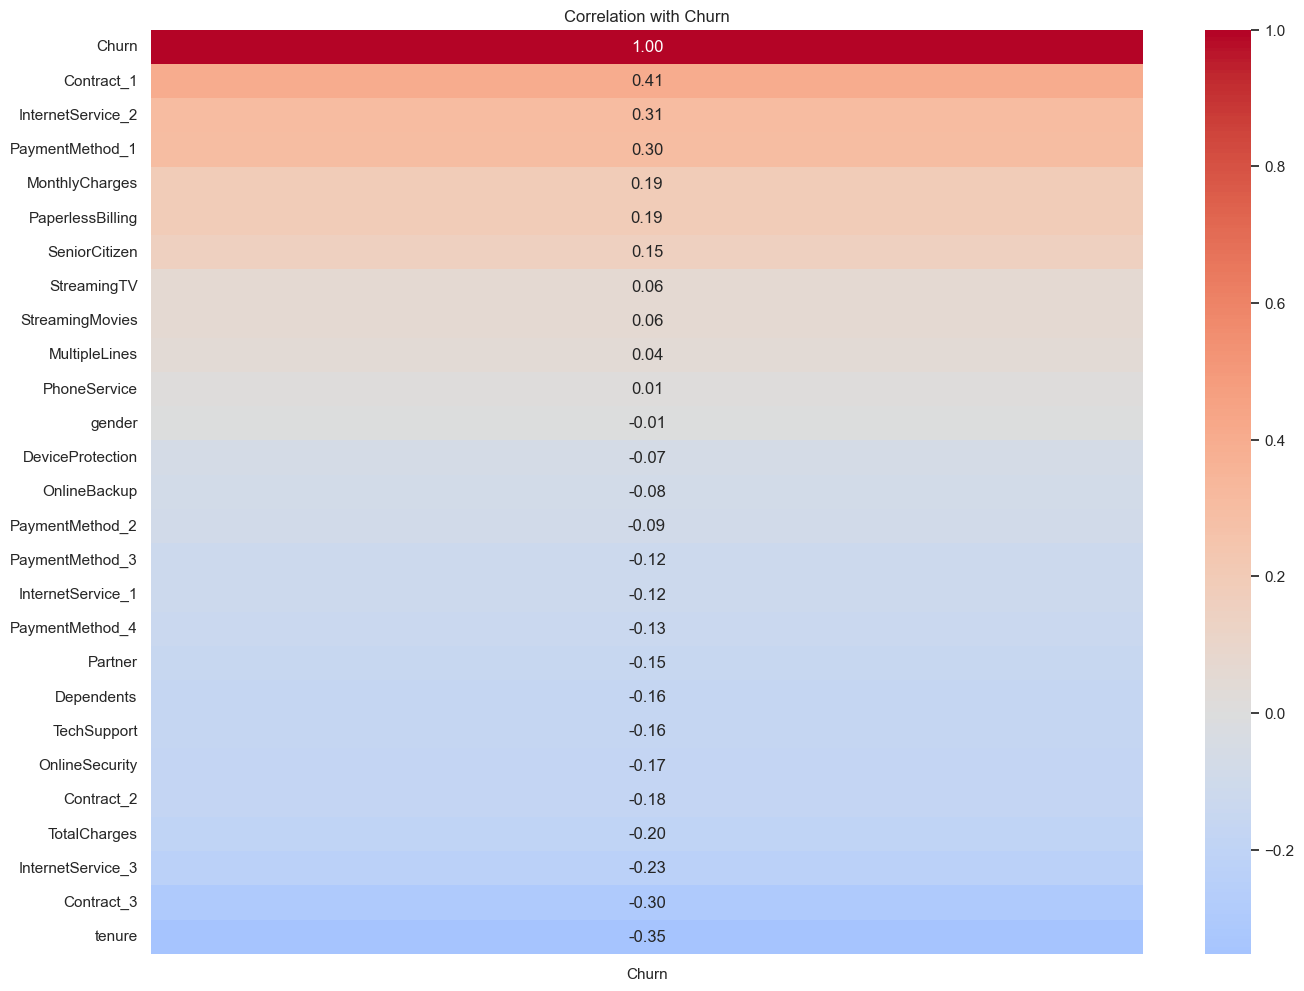

In [91]:
# correlation matrix
correlation_matrix = df_churn.corr()

# correlation of all features with Churn
churn_correlations = correlation_matrix[['Churn']].sort_values(by='Churn', ascending=False)

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation with Churn')
plt.show()

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(churn_correlations, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation with Churn')
plt.show()

Here we can see the strength of the linear relationship between eatures and churn.

there are some moderate negative and positive correlations:

- tenure, contract types(the long ones), no internet service, and the use of some services negatively correlated with churn meaning if the value in these features gets higher the churn value is expcted to get lower(less risk if the value in these colsumns are high)

- monthly contract, fiber internet, payment through electronic check are the strongest positively correlated columns with churn. Meaning the higher the value in these column the higher is the expected risk of churn.

these correlations will be helpful for a classification model to correctly predict the probabilities of churn

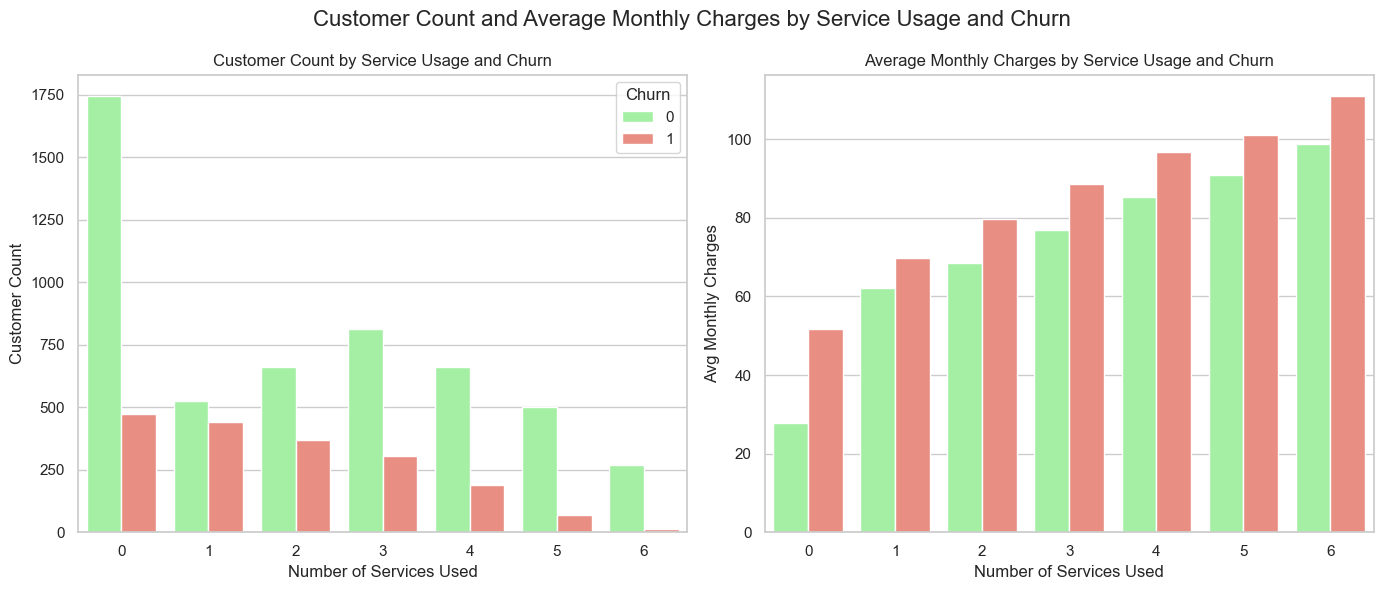

In [93]:
# Select columns for services
services_columns = [
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies'
]

services_df = df_churn[services_columns]

# Count the number of services used
services_df_sum = services_df.sum(axis=1)
df_churn['ServiceUsageCount'] = services_df_sum

# Calculate churn counts for each group
churn_counts = df_churn.groupby(['ServiceUsageCount', 'Churn']).size().reset_index(name='CustomerCount')
avg_monthly_charges = df_churn.groupby(['ServiceUsageCount', 'Churn'])['MonthlyCharges'].mean().reset_index(name='AvgMonthlyCharges')

# Set up a grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Customer Count and Average Monthly Charges by Service Usage and Churn', fontsize=16)

# Plot for customer count by service usage and churn
sns.barplot(
    data=churn_counts, 
    x='ServiceUsageCount', 
    y='CustomerCount', 
    hue='Churn', 
    palette={1: 'salmon', 0: 'palegreen'}, 
    ax=axes[0]
)
axes[0].set_title('Customer Count by Service Usage and Churn')
axes[0].set_xlabel('Number of Services Used')
axes[0].set_ylabel('Customer Count')

# Plot for average monthly charges by service usage and churn
sns.barplot(
    data=avg_monthly_charges, 
    x='ServiceUsageCount', 
    y='AvgMonthlyCharges', 
    hue='Churn', 
    palette={1: 'salmon', 0: 'palegreen'}, 
    ax=axes[1]
)
axes[1].set_title('Average Monthly Charges by Service Usage and Churn')
axes[1].set_xlabel('Number of Services Used')
axes[1].set_ylabel('Avg Monthly Charges')

# Remove legend from the second plot as it's already in the first
axes[1].legend_.remove()

# Display the plots
plt.tight_layout()
plt.show()

- We can see that customer who only use basic services (phone or internet) have a lower churn rate than customers who use 1 to 3 extra services. Cusomers who are using all extra services are the lest likely to churn.
- The second graph shows that among customers who don't use extra services the churn rate is more impacted by the monthly charges. 

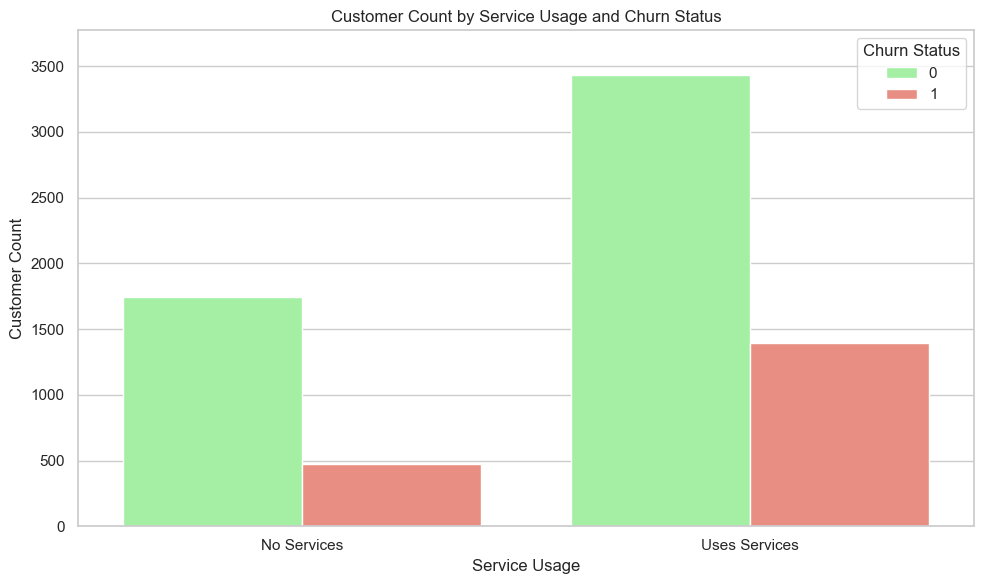

In [95]:
# Create a binary column for "any service" usage
df_churn['UsesAnyService'] = df_churn['ServiceUsageCount'].apply(lambda x: 'Uses Services' if x > 0 else 'No Services')

# Calculate churn counts for customers who use services vs those who don't
churn_counts_any_service = df_churn.groupby(['UsesAnyService', 'Churn']).size().reset_index(name='CustomerCount')

# Calculate total counts for each group (to use for percentages)
total_counts = churn_counts_any_service.groupby('UsesAnyService')['CustomerCount'].sum().reset_index(name='TotalCount')

# Merge total counts back to the churn counts to calculate percentages
churn_counts_any_service = pd.merge(churn_counts_any_service, total_counts, on='UsesAnyService')
churn_counts_any_service['Percentage'] = (churn_counts_any_service['CustomerCount'] / churn_counts_any_service['TotalCount']) * 100

# Set up a plot for customer count by service usage
plt.figure(figsize=(10, 6))
sns.barplot(
    data=churn_counts_any_service, 
    x='UsesAnyService', 
    y='CustomerCount', 
    hue='Churn', 
    palette={1: 'salmon', 0: 'palegreen'}
)
plt.title('Customer Count by Service Usage and Churn Status')
plt.xlabel('Service Usage')
plt.ylabel('Customer Count')
plt.ylim(0, churn_counts_any_service['CustomerCount'].max() * 1.1)
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()




- Customers who don't use extra services are less likely to churn
- This suggest the customers think the extra value of these services not fully justifies the raise in monthly charges.

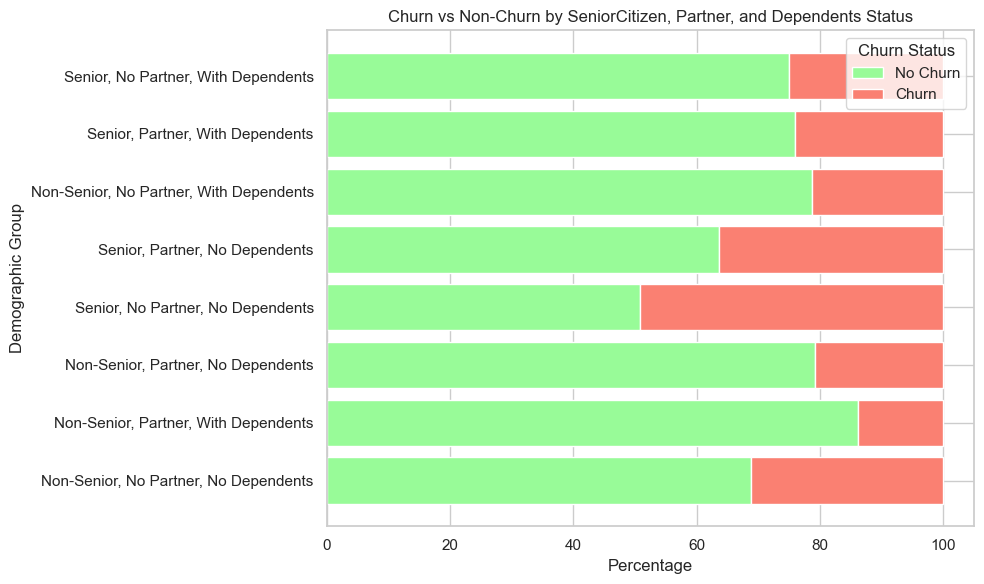

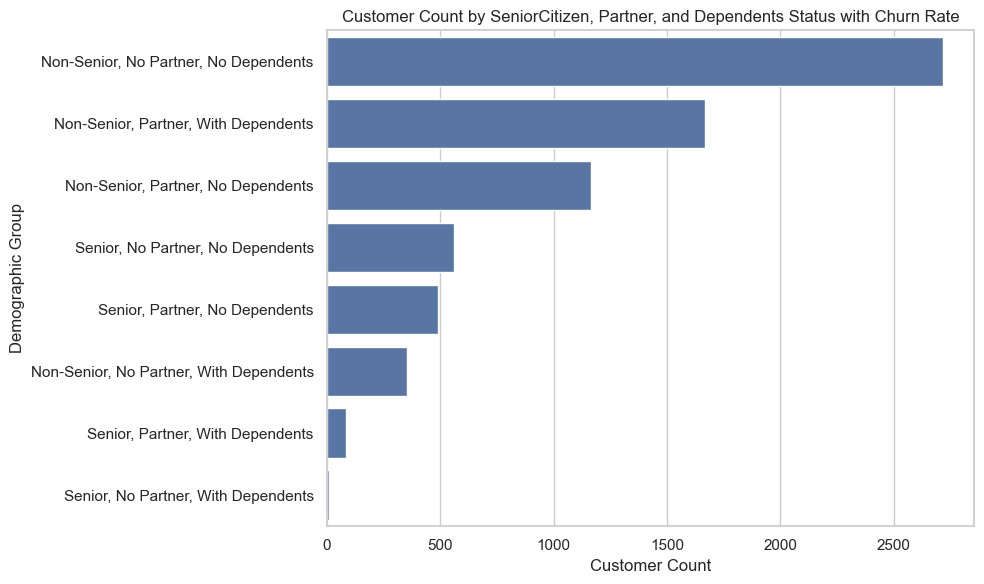

In [109]:
# Combine SeniorCitizen, Partner, and Dependents into one column
df_churn['Senior_Partner_Dependents'] = (
    df_churn['SeniorCitizen'].astype(str) + '_' + 
    df_churn['Partner'].astype(str) + '_' + 
    df_churn['Dependents'].astype(str)
)

# Calculate churn rates 
churn_rate_combined = df_churn.groupby('Senior_Partner_Dependents')['Churn'].mean().reset_index()
churn_rate_combined['Churn'] = churn_rate_combined['Churn'] * 100  # Convert to percentage

# Count the number of customers in each group
customer_counts = df_churn.groupby('Senior_Partner_Dependents')['Churn'].size().reset_index(name='CustomerCount')
combined_stats = pd.merge(churn_rate_combined, customer_counts, on='Senior_Partner_Dependents')

# Create readable labels 
combined_stats['Senior_Partner_Dependents'] = combined_stats['Senior_Partner_Dependents'].replace({
    '0_0_0': 'Non-Senior, No Partner, No Dependents',
    '0_0_1': 'Non-Senior, No Partner, With Dependents',
    '0_1_0': 'Non-Senior, Partner, No Dependents',
    '0_1_1': 'Non-Senior, Partner, With Dependents',
    '1_0_0': 'Senior, No Partner, No Dependents',
    '1_0_1': 'Senior, No Partner, With Dependents',
    '1_1_0': 'Senior, Partner, No Dependents',
    '1_1_1': 'Senior, Partner, With Dependents'
})
combined_stats['NonChurn'] = 100 - combined_stats['Churn']  # Non-Churn percentage

combined_stats.sort_values(by='CustomerCount',ascending=False, inplace=True)
# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot non-churn percentage
ax.barh(
    combined_stats['Senior_Partner_Dependents'],
    combined_stats['NonChurn'],
    label='No Churn', color='palegreen'
)

# Plot churn percentage on top
ax.barh(
    combined_stats['Senior_Partner_Dependents'],
    combined_stats['Churn'],
    left=combined_stats['NonChurn'],  # Stacked on top of non-churn
    label='Churn', color='salmon'
)

ax.set_xlabel('Percentage')
ax.set_ylabel('Demographic Group')
ax.set_title('Churn vs Non-Churn by SeniorCitizen, Partner, and Dependents Status')
ax.legend(title='Churn Status')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=combined_stats, 
    x='CustomerCount', 
    y='Senior_Partner_Dependents', 
    hue=None, 
)

plt.title('Customer Count by SeniorCitizen, Partner, and Dependents Status with Churn Rate')
plt.xlabel('Customer Count')
plt.ylabel('Demographic Group')
plt.tight_layout()
plt.show()

- The graph show that young families (non-senior,partner with dependents) are the most loyal customers.(13.7% churn)
- Senior citizens who leave alone have the highest risk of churning.(49.2%)
- The majority of customers are single with no dependants and a churn rate of 31% (sligtly above the average)

In [111]:
df_churn.drop(columns=['UsesAnyService','Senior_Partner_Dependents','ServiceUsageCount'],inplace=True)

In [112]:
# Exporting data for ML
df_churn.to_csv('data/Churn_prepared.csv')

# Predictions

We already optimized and compared multiple models, now we are going to use the 2 best performing ones to predict churners.

In [113]:
import joblib 
# Importing model (opted with optuna, compared metrics with other models)
xgb_model = joblib.load('xgb_model.pkl')


We are going to do a train-test split. This is simple method that can give us an estimate on how the model would perform on unseen data(wher we dont know the churn outcome).

In [114]:
# Defining target and features

X=df_churn.drop(columns='Churn')
y=df_churn['Churn']
# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit the models on the training data
xgb_model.fit(X_train, y_train)

# Get predicted probas
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]  

# Store the data in a df (we add the true labels to verify the predictions)
churn_with_probas = pd.DataFrame({
    "xgb_proba": xgb_probs,
    "true_label": y_test})


# Turning predictions into value



### OPTION 1: 
    we use the predicted probabilities to find the customers with the highest risk of churn.


In [115]:
churn_with_probas.sort_values(by='xgb_proba',ascending=False).head(20)

,xgb_proba,true_label
customerID,,
5419-JPRRN,0.891369,1
4910-GMJOT,0.881583,1
3068-OMWZA,0.879436,1
4826-XTSOH,0.879389,1
0295-PPHDO,0.876034,1
8580-AECUZ,0.868375,1
4102-OQUPX,0.866143,1
1833-VGRUM,0.863710,1
8473-VUVJN,0.861412,1


    - The model only missed 1 out of 20 labels. The models accuracy usually is better in edge cases (very low chance or very high chance of churn).
    - The company can reach out to these customers and try to retain them, potentially saving profit.


### OPTION 2:

    Based on the probabilities we can group customers by their churn risk.
    This can help the company to create different strategies for customers with different levels of churn risk.

In [116]:
# Method 1: Using Probability Thresholds
def assign_risk_levels_thresholds(probas, thresholds):
    risk_levels = []
    for proba in probas:
        if proba < thresholds[0]:
            risk_levels.append('Low')
        elif proba < thresholds[1]:
            risk_levels.append('Medium')
        elif proba < thresholds[2]:
            risk_levels.append('High')
        else:
            risk_levels.append('Very High')
    return risk_levels

thresholds = [0.25, 0.5, 0.75]  
churn_with_probas['risk_level'] = assign_risk_levels_thresholds(churn_with_probas['xgb_proba'], thresholds)

# Method 2: Using Probability Quartiles
def assign_risk_levels_quartiles(probas):
    quartiles = np.percentile(probas, [0, 25, 50, 75, 100])
    risk_levels = []
    for proba in probas:
        if proba <= quartiles[1]:
            risk_levels.append('Low')
        elif proba <= quartiles[2]:
            risk_levels.append('Medium')
        elif proba <= quartiles[3]:
            risk_levels.append('High')
        else:
            risk_levels.append('Very High')
    return risk_levels

churn_with_probas['risk_level_quartile'] = assign_risk_levels_quartiles(churn_with_probas['xgb_proba'])


In [117]:
churn_with_probas.head()


,xgb_proba,true_label,risk_level,risk_level_quartile
customerID,,,,
8879-ZKJOF,0.110936,0,Low,Medium
0201-MIBOL,0.105874,0,Low,Medium
1600-DILPE,0.231214,0,Low,High
8601-QACRS,0.386360,1,Medium,High
7919-ZODZZ,0.155345,0,Low,Medium



- First Method: Manual Probability Thresholds
In this approach, we set specific cut-off points for the predicted churn probabilities to decide risk levels. For example, if a customer's churn probability is higher than 0.75, they will be labeled as "Very High" risk. 

- Second Method: Quartile Ranges
This method uses the distribution of all predicted probabilities to assign risk levels. We look at the top 25% of predicted probabilities and classify those customers as "Very High" risk. This segmentation is more flexible because it adapts to the data distribution.


The main difference between these two methods is how they decide on risk levels. The first method uses fixed numbers to classify customers, while the second method uses the actual spread of probabilities in the data. Because of this, the two methods can give different risk levels to customers, depending on how the probabilities are distributed.

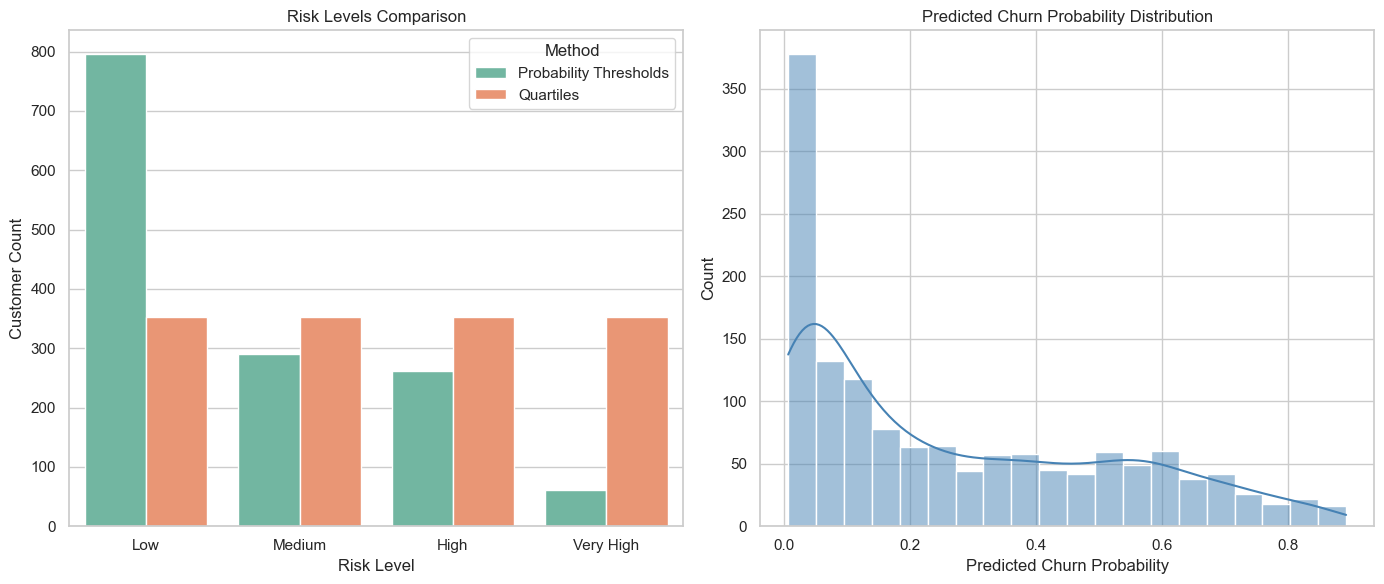

In [118]:

# Counts of each risk level for Method 1
risk_counts_method1 = churn_with_probas['risk_level'].value_counts().reset_index()
risk_counts_method1.columns = ['Risk Level', 'Count']  
risk_counts_method1['Method'] = 'Probability Thresholds' 

# Counts of each risk level for Method 2
risk_counts_method2 = churn_with_probas['risk_level_quartile'].value_counts().reset_index()
risk_counts_method2.columns = ['Risk Level', 'Count']  
risk_counts_method2['Method'] = 'Quartiles'  

# Combine both counts 
risk_counts = pd.concat([risk_counts_method1, risk_counts_method2], ignore_index=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(
    data=risk_counts, 
    x='Risk Level', 
    y='Count', 
    hue='Method', 
    ax=axes[0],  
    palette='Set2'
)

axes[0].set_title('Risk Levels Comparison')
axes[0].set_xlabel('Risk Level')
axes[0].set_ylabel('Customer Count')

sns.histplot(
    data=churn_with_probas, 
    x='xgb_proba', 
    kde=True, 
    bins=20,  
    ax=axes[1],  
    color='steelblue'
)

axes[1].set_title('Predicted Churn Probability Distribution')
axes[1].set_xlabel('Predicted Churn Probability')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Another data-driven strategy is to identify customers with a churn probability close to 0.5 and proactively reach out to them with targeted churn prevention. 

# OPTION 3:
    We can extract the feature importances from the model.
    This can help us to define the most impactful characteristics and use them for further customer segmentation.

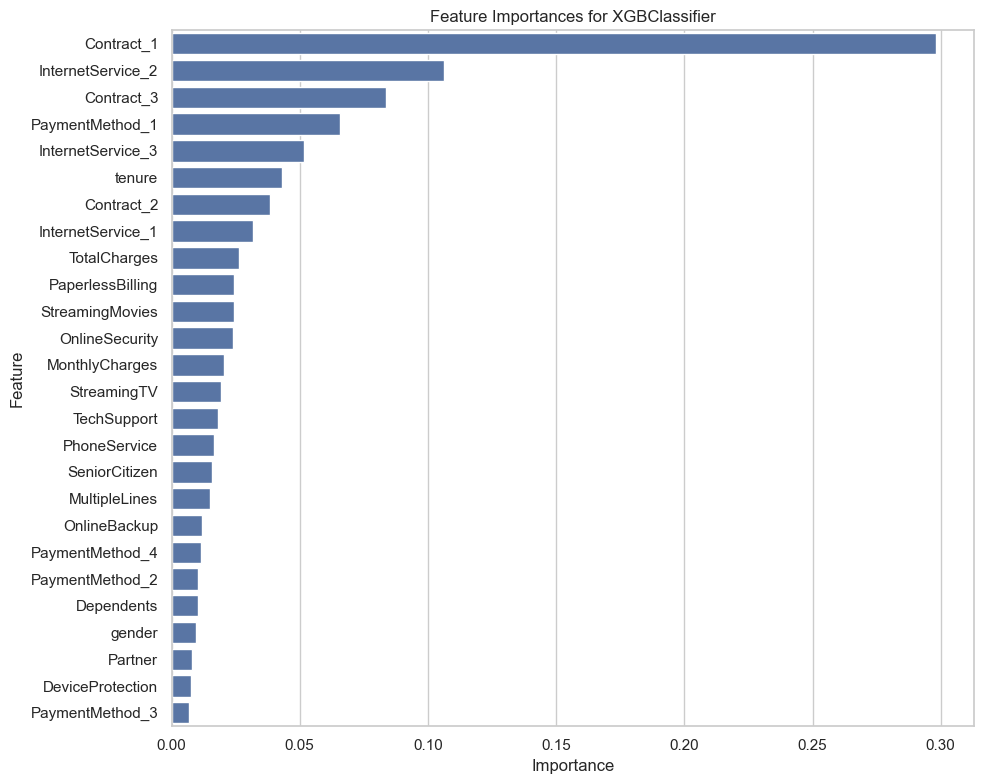

In [122]:
feature_importances = xgb_model.feature_importances_

# Convert it into a DataFrame for better readability
importances_df = pd.DataFrame({
    'Feature': X_train.columns,  # Replace with your feature names
    'Importance': feature_importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Set up the figure
plt.figure(figsize=(10, 8))  

# Create a horizontal barplot
sns.barplot(
    data=importances_df, 
    x='Importance', 
    y='Feature') 

# Add titles, labels
plt.title('Feature Importances for XGBClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()


The most important features for the model are, month-to-month contract, fiber optic internet service, two year contract,
electronic check payment method, no internet service and tenure.